In [1]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
import matplotlib.pyplot as plt
from util import *
from loss import *
from Estimator import *
from scaling import *
from cluster import *

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


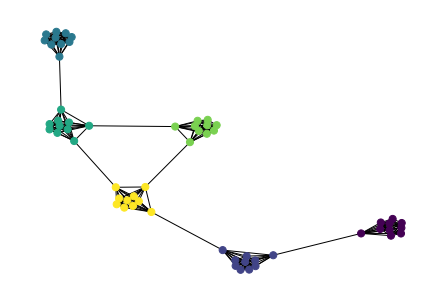

In [2]:
list_shapes = ['nx.complete_graph'] * 6
list_shapes_args = [[10]]*6 
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [6, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
L, D, Gamma = graph_to_mat(G)
node_features, group_mean, new_group_label = separated_feature_generator(group_label, num_separated=1, num_features=20, std=0.5, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


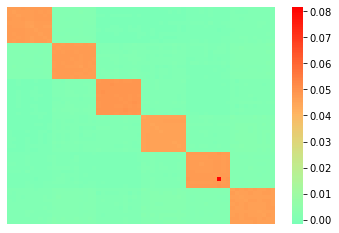

In [3]:
sele = symElastEstimator(l1=5, l2=10, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

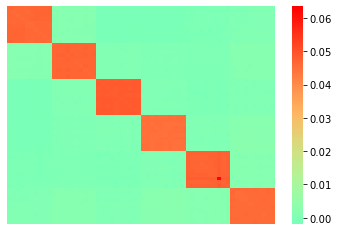

In [4]:
sele = symElastEstimator(l1=5, l2=5, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

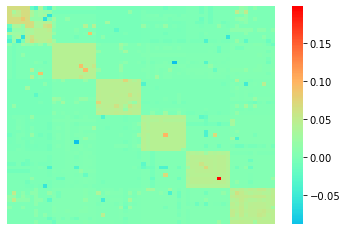

In [5]:
sele = symElastEstimator(l1=1, l2=1, l3=30, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

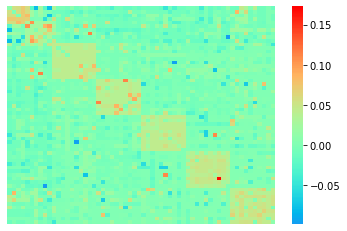

In [6]:
sele = symElastEstimator(l1=0.5, l2=1, l3=30, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

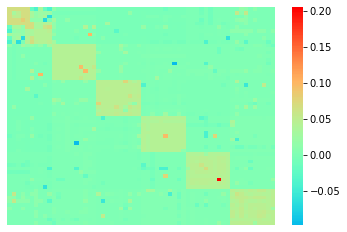

In [7]:
sele = symElastEstimator(l1=1, l2=0.5, l3=30, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

<AxesSubplot:>

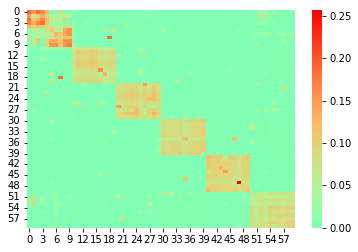

In [8]:
W0 = sele.W.value
W0[W0<0] = 0
W_new = symscaling(sele.W.value, epsilon=1e-8, max_iter=1000)
sb.heatmap(W_new, cmap='rainbow', center=0)

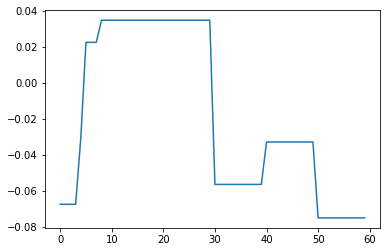

In [9]:
pred_final = eigengap(W_new, method='dt')
plt.plot(pred_final)